## Importing Libraries

In [1]:
# Data Analysis and Processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Natural Language Processing
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

# Model Related
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Evaluation
from sklearn.metrics import silhouette_score

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chingyiie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chingyiie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1")

## Preliminary Analysis and Processing

In [3]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df[['Quantity', 'UnitPrice']].describe()

Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000

In [6]:
df['CustomerID'].nunique()

4372

In [7]:
df[df['CustomerID'].isna()].head()

InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

          InvoiceDate  UnitPrice  CustomerID         Country  
622   12/1/2010 11:52       0.00         NaN  United Kingdom  
1443  12/1/2010 14:32       2.51         NaN  United Kingdom  
1444  12/1/2010 14:32       2.51         NaN  United Kingdom  
1445  12/1/2010 14:32       0.85         NaN  United Kingdom  
1446  12/1/2010 14:32       1.66         NaN  United Kingdom

In [8]:
df[df['UnitPrice'] == 0].head()

InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56  12/1/2010 11:52        0.0   
1970    536545     21134         NaN         1  12/1/2010 14:32        0.0   
1971    536546     22145         NaN         1  12/1/2010 14:33        0.0   
1972    536547     37509         NaN         1  12/1/2010 14:33        0.0   
1987    536549    85226A         NaN         1  12/1/2010 14:34        0.0   

      CustomerID         Country  
622          NaN  United Kingdom  
1970         NaN  United Kingdom  
1971         NaN  United Kingdom  
1972         NaN  United Kingdom  
1987         NaN  United Kingdom

In [9]:
# Dropping those with unit price 0, as we assume it is cancelled or a mistake
df = df.drop(df[df['UnitPrice'] == 0].index, axis = 0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539394 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      539394 non-null object
StockCode      539394 non-null object
Description    539394 non-null object
Quantity       539394 non-null int64
InvoiceDate    539394 non-null object
UnitPrice      539394 non-null float64
CustomerID     406789 non-null float64
Country        539394 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 37.0+ MB


In [11]:
df[df['CustomerID'].isna()].head()

InvoiceNo StockCode                      Description  Quantity  \
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   
1447    536544     21790               VINTAGE SNAP CARDS         9   

          InvoiceDate  UnitPrice  CustomerID         Country  
1443  12/1/2010 14:32       2.51         NaN  United Kingdom  
1444  12/1/2010 14:32       2.51         NaN  United Kingdom  
1445  12/1/2010 14:32       0.85         NaN  United Kingdom  
1446  12/1/2010 14:32       1.66         NaN  United Kingdom  
1447  12/1/2010 14:32       1.66         NaN  United Kingdom

In [12]:
# Getting the unique invoice numbers for purchases without a customer ID
unique_invoiceNo = df[df['CustomerID'].isna()]['InvoiceNo'].unique()

In [13]:
len(unique_invoiceNo)

1612

In [14]:
df['InvoiceNo'].nunique()
# The missing customer IDs make up a small portion of the data

23798

In [15]:
sum(df[df['InvoiceNo'].isin(unique_invoiceNo)]['CustomerID'].isna() == False)
# There is no customer ID to compare with per invoice

0

In [16]:
df[df['UnitPrice'] < 0]

InvoiceNo StockCode      Description  Quantity      InvoiceDate  \
299983   A563186         B  Adjust bad debt         1  8/12/2011 14:51   
299984   A563187         B  Adjust bad debt         1  8/12/2011 14:52   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

In [17]:
# We look at the invoices prior
df[df['InvoiceNo'] == 'A563185']

InvoiceNo StockCode      Description  Quantity      InvoiceDate  \
299982   A563185         B  Adjust bad debt         1  8/12/2011 14:50   

        UnitPrice  CustomerID         Country  
299982   11062.06         NaN  United Kingdom

In [18]:
# Since we are going to drop the missing customer IDs, we can ignore this problem for now
df = df.drop(df[df['CustomerID'].isna()].index, axis = 0)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406789 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406789 non-null object
StockCode      406789 non-null object
Description    406789 non-null object
Quantity       406789 non-null int64
InvoiceDate    406789 non-null object
UnitPrice      406789 non-null float64
CustomerID     406789 non-null float64
Country        406789 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [20]:
# Reducing sample to increase speed as working on whole data takes too long to run
sample_df = df.sample(10000, random_state = 1)

## Product Segmentation

In [21]:
# We extract just the description of the products
products_df = sample_df['Description']

In [22]:
# Removing stopwords, colors, numbers, and lemmatizing
def clean_data(description):
    wnl = WordNetLemmatizer()
    # Removing stopwords and lemmatizing
    cleaned = [wnl.lemmatize(word) for word in description.lower().split() if not word in set(stopwords.words('english'))]
    # Removing colors
    cleaned = [word for word in cleaned if not word in ['pink', 'blue', 'green', 'orange', 'red', 'white', 'black']]
    # Removing numbers
    cleaned = [word for word in cleaned if not word.isdigit()]
    cleaned = ' '.join(cleaned).upper()
    return cleaned

sample_df['CleanedDescription'] = products_df.apply(lambda x: clean_data(x))
products = products_df.apply(lambda x: clean_data(x)).values

In [23]:
products

array(['ASSORTED COLOUR BIRD ORNAMENT', 'CHILDRENS CUTLERY DOLLY GIRL',
       'DOORMAT SPOTTY HOME SWEET HOME', ..., 'PARTY TIME PENCIL ERASER',
       'ALARM CLOCK BAKELIKE CHOCOLATE', 'SCANDINAVIAN PAISLEY WRAP'],
      dtype=object)

In [24]:
products.shape

(10000,)

In [25]:
# We convert the descriptions into a bag of words model
bow_transformer = CountVectorizer(max_features = 500).fit(products)
bow = bow_transformer.transform(products)

In [26]:
# We order the words by the most frequent
sum_words = bow.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in bow_transformer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

In [27]:
x = [x for x, y in words_freq[:20]]
y = [y for x, y in words_freq[:20]]

<BarContainer object of 20 artists>

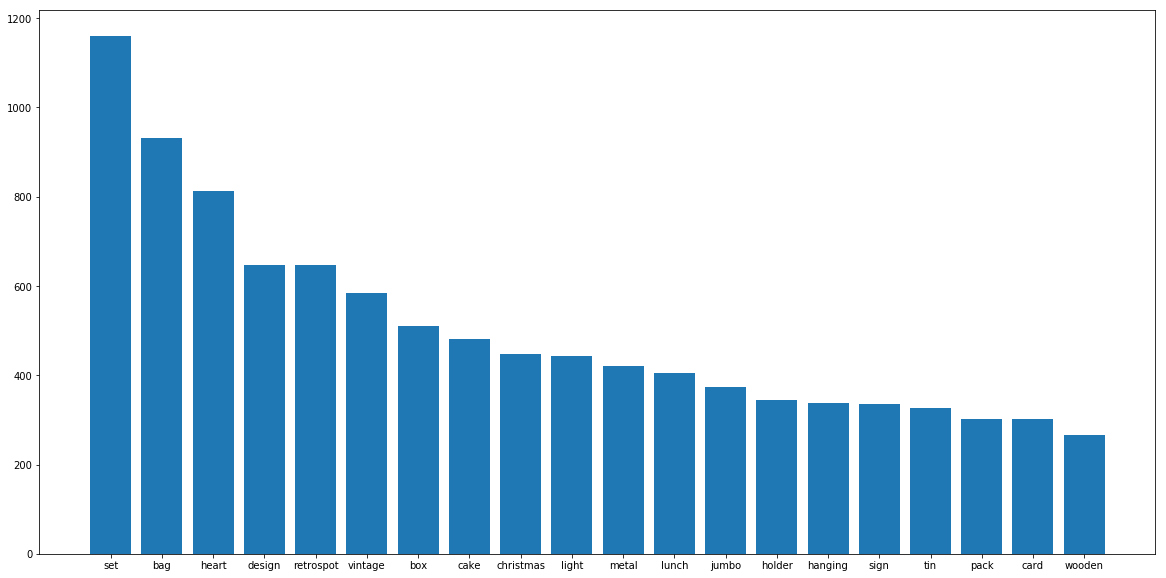

In [28]:
# Looking at the top 20 words
plt.figure(figsize=(20,10))
plt.bar(x,y)

In [29]:
# Calculating silhouette score for different cluster numbers
for n_clusters in range(2,20):
    kmeans = KMeans(n_clusters = n_clusters, init="k-means++")
    kmeans.fit(bow)
    clusters = kmeans.predict(bow)
    silhouette_avg = silhouette_score(bow, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.06344192928945433
For n_clusters = 3 The average silhouette_score is : 0.046997277926227585
For n_clusters = 4 The average silhouette_score is : 0.052710363167266724
For n_clusters = 5 The average silhouette_score is : 0.055935193173655515
For n_clusters = 6 The average silhouette_score is : 0.06535546715366505
For n_clusters = 7 The average silhouette_score is : 0.0481142453916567
For n_clusters = 8 The average silhouette_score is : 0.05775074327832614
For n_clusters = 9 The average silhouette_score is : 0.06799451101934857
For n_clusters = 10 The average silhouette_score is : 0.06960843632479648
For n_clusters = 11 The average silhouette_score is : 0.0793743489658095
For n_clusters = 12 The average silhouette_score is : 0.07050522593290962
For n_clusters = 13 The average silhouette_score is : 0.06413768584088404
For n_clusters = 14 The average silhouette_score is : 0.055860565774526444
For n_clusters = 15 The average silhouette_s

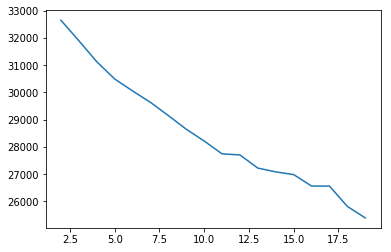

In [30]:
# Using the elbow method
wcss = []
for n_clusters in range(2,20):
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++")
    kmeans.fit(bow)
    wcss.append(kmeans.inertia_)
    
plt.figure()
plt.plot(range(2,20), wcss)
plt.show()

In [70]:
# Both methods do not give a definitive k value, hence we will use 11 clusters (k = 11)
K_value = 11

kmeans = KMeans(n_clusters=K_value, init="k-means++")
kmeans.fit(bow)
clusters = kmeans.predict(bow)

In [71]:
# The number of words per cluster
pd.Series(clusters).value_counts()

1     5685
8     1140
3      744
9      544
6      321
0      317
2      294
4      286
10     263
7      227
5      179
dtype: int64

In [72]:
sample_df['ProductCategory'] = clusters

In [73]:
# Looking at a example cluster
sample_df[sample_df['ProductCategory'] == 0]['CleanedDescription'].head()

417332      FRENCH KITCHEN SIGN METAL
207364      POTTERING SHED METAL SIGN
19574            COOK WINE METAL SIGN
429226      POTTERING SHED METAL SIGN
364626    LADY & GENTLEMAN METAL SIGN
Name: CleanedDescription, dtype: object

In [74]:
# Defining cluster words
cluster0 = (' ').join(sample_df[sample_df['ProductCategory'] == 0]['CleanedDescription'])
cluster1 = (' ').join(sample_df[sample_df['ProductCategory'] == 1]['CleanedDescription'])
cluster2 = (' ').join(sample_df[sample_df['ProductCategory'] == 2]['CleanedDescription'])
cluster3 = (' ').join(sample_df[sample_df['ProductCategory'] == 3]['CleanedDescription'])
cluster4 = (' ').join(sample_df[sample_df['ProductCategory'] == 4]['CleanedDescription'])
cluster5 = (' ').join(sample_df[sample_df['ProductCategory'] == 5]['CleanedDescription'])
cluster6 = (' ').join(sample_df[sample_df['ProductCategory'] == 6]['CleanedDescription'])
cluster7 = (' ').join(sample_df[sample_df['ProductCategory'] == 7]['CleanedDescription'])
cluster8 = (' ').join(sample_df[sample_df['ProductCategory'] == 8]['CleanedDescription'])
cluster9 = (' ').join(sample_df[sample_df['ProductCategory'] == 9]['CleanedDescription'])
cluster10 = (' ').join(sample_df[sample_df['ProductCategory'] == 10]['CleanedDescription'])

In [75]:
# Creating cluster dictionaries with word:frequency
d0 = {word:cluster0.split().count(word) for word in cluster0.split()}
d1 = {word:cluster1.split().count(word) for word in cluster1.split()}
d2 = {word:cluster2.split().count(word) for word in cluster2.split()}
d3 = {word:cluster3.split().count(word) for word in cluster3.split()}
d4 = {word:cluster4.split().count(word) for word in cluster4.split()}
d5 = {word:cluster5.split().count(word) for word in cluster5.split()}
d6 = {word:cluster6.split().count(word) for word in cluster6.split()}
d7 = {word:cluster7.split().count(word) for word in cluster7.split()}
d8 = {word:cluster8.split().count(word) for word in cluster8.split()}
d9 = {word:cluster9.split().count(word) for word in cluster9.split()}
d10 = {word:cluster10.split().count(word) for word in cluster10.split()}

In [76]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

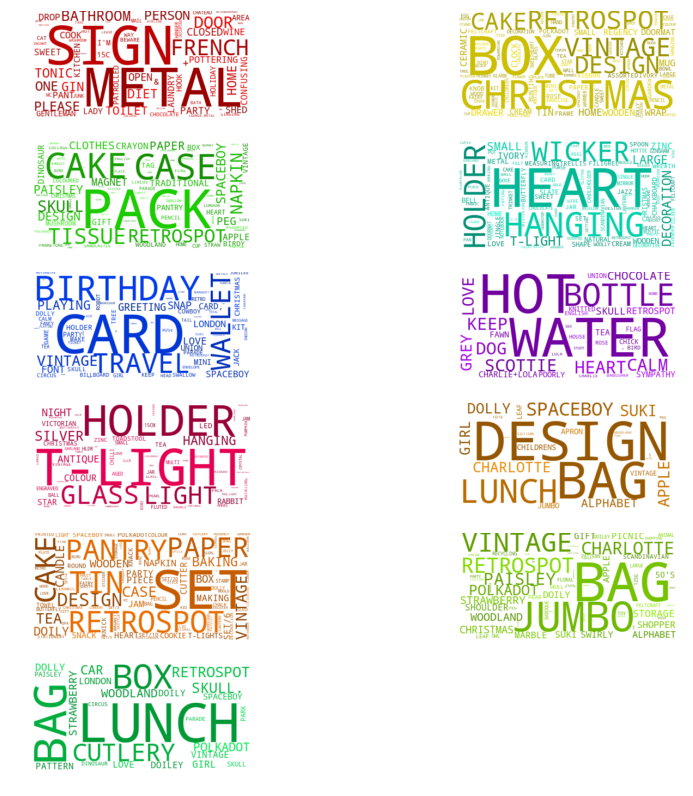

In [77]:
# Visualizing the word clouds
cluster_list = [d0, d1, d2, d3, d4, d5, d6, d7, d8, d9, d10]
color = [0, 40, 80, 120, 160, 200, 240, 280, 20, 60, 100]

fig = plt.figure(figsize=(14,14))

for i in range(K_value):
    ax1 = fig.add_subplot(6, 2, i + 1)
    tone = color[i]
    wordcloud = WordCloud(max_font_size=100, 
                          max_words=100, 
                          background_color="white",
                          color_func=random_color_func)
    wordcloud.generate_from_frequencies(frequencies=cluster_list[i])
    ax1.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

## Customer Segmentation

In [78]:
sample_df.head()

InvoiceNo StockCode                     Description  Quantity  \
436737    574239     84879   ASSORTED COLOUR BIRD ORNAMENT        32   
340805    566720     23254   CHILDRENS CUTLERY DOLLY GIRL          1   
75185     542542     21524  DOORMAT SPOTTY HOME SWEET HOME         2   
445526    574846     23318  BOX OF 6 MINI VINTAGE CRACKERS         4   
124653    546984    85049C         ROMANTIC PINKS RIBBONS          1   

            InvoiceDate  UnitPrice  CustomerID         Country  \
436737  11/3/2011 12:43       1.69     14849.0  United Kingdom   
340805  9/14/2011 12:42       4.15     13634.0  United Kingdom   
75185   1/28/2011 14:37       7.95     12431.0       Australia   
445526  11/7/2011 11:59       2.49     14702.0  United Kingdom   
124653  3/18/2011 12:35       1.25     15019.0  United Kingdom   

                    CleanedDescription  ProductCategory  TotalPrice  
436737   ASSORTED COLOUR BIRD ORNAMENT                1       54.08  
340805    CHILDRENS CUTLERY DOLLY GIRL                1        4.15  
75185   DOORMAT SPOTTY HOME SWEET HOME                1       15.90  
445526        BOX MINI VINTAGE CRACKER                1        9.96  
124653                 ROMANTIC RIBBON                1        1.25

In [79]:
# Per CustomerID, we want to look at 
# 1. Total Price Spent
# 2. Total Quantity Purchased
# 3. Product Categories Purchased From

In [81]:
# We first create a total price column
cust_df = sample_df
cust_df['TotalPrice'] = cust_df[['Quantity', 'UnitPrice']].apply(lambda x: x[0] * x[1], axis=1)
# Create dummy variable for ProductCategory
cat_dummy = pd.get_dummies(cust_df['ProductCategory'])
cust_df = cust_df.drop(['ProductCategory'], axis=1)
cust_df = pd.concat([cust_df, cat_dummy], axis=1)

# Renaming columns
cust_df.columns = cust_df.columns[:10].tolist() + ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10']

In [82]:
cust_df.head()

InvoiceNo StockCode                     Description  Quantity  \
436737    574239     84879   ASSORTED COLOUR BIRD ORNAMENT        32   
340805    566720     23254   CHILDRENS CUTLERY DOLLY GIRL          1   
75185     542542     21524  DOORMAT SPOTTY HOME SWEET HOME         2   
445526    574846     23318  BOX OF 6 MINI VINTAGE CRACKERS         4   
124653    546984    85049C         ROMANTIC PINKS RIBBONS          1   

            InvoiceDate  UnitPrice  CustomerID         Country  \
436737  11/3/2011 12:43       1.69     14849.0  United Kingdom   
340805  9/14/2011 12:42       4.15     13634.0  United Kingdom   
75185   1/28/2011 14:37       7.95     12431.0       Australia   
445526  11/7/2011 11:59       2.49     14702.0  United Kingdom   
124653  3/18/2011 12:35       1.25     15019.0  United Kingdom   

                    CleanedDescription  TotalPrice  ...  cat1  cat2  cat3  \
436737   ASSORTED COLOUR BIRD ORNAMENT       54.08  ...     1     0     0   
340805    CHILDRENS CUTLERY DOLLY GIRL        4.15  ...     1     0     0   
75185   DOORMAT SPOTTY HOME SWEET HOME       15.90  ...     1     0     0   
445526        BOX MINI VINTAGE CRACKER        9.96  ...     1     0     0   
124653                 ROMANTIC RIBBON        1.25  ...     1     0     0   

        cat4  cat5  cat6  cat7  cat8  cat9  cat10  
436737     0     0     0     0     0     0      0  
340805     0     0     0     0     0     0      0  
75185      0     0     0     0     0     0      0  
445526     0     0     0     0     0     0      0  
124653     0     0     0     0     0     0      0  

[5 rows x 21 columns]

In [83]:
uniq_cust_df = cust_df[['CustomerID', 'Quantity', 'TotalPrice', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10']]
uniq_cust_df = uniq_cust_df.groupby('CustomerID').sum()

In [84]:
uniq_cust_df.head()

Quantity  TotalPrice  cat0  cat1  cat2  cat3  cat4  cat5  cat6  \
CustomerID                                                                   
12347.0           40       86.40     0     4     0     0     0     0     0   
12349.0            6       22.50     0     1     0     0     0     0     0   
12352.0          -15       -2.13     0     3     0     1     0     0     0   
12353.0            2       19.90     0     1     0     0     0     0     0   
12354.0           33       69.03     0     2     0     0     0     0     0   

            cat7  cat8  cat9  cat10  
CustomerID                           
12347.0        0     0     0      0  
12349.0        0     0     0      0  
12352.0        0     0     0      0  
12353.0        0     0     0      0  
12354.0        0     0     0      0

In [85]:
len(uniq_cust_df[uniq_cust_df['Quantity'] < 0])

33

In [86]:
# Since we took a sample from the original data, it is possible that some adjustments are not captured.
# This makes it possible to have negative quantities and total prices
# For simplicity, we will remove such values
uniq_cust_df = uniq_cust_df.drop(uniq_cust_df[uniq_cust_df['Quantity'] < 0].index, axis = 0)

In [87]:
uniq_cust_df.head()

Quantity  TotalPrice  cat0  cat1  cat2  cat3  cat4  cat5  cat6  \
CustomerID                                                                   
12347.0           40       86.40     0     4     0     0     0     0     0   
12349.0            6       22.50     0     1     0     0     0     0     0   
12353.0            2       19.90     0     1     0     0     0     0     0   
12354.0           33       69.03     0     2     0     0     0     0     0   
12356.0           36       96.60     0     1     0     0     0     0     0   

            cat7  cat8  cat9  cat10  
CustomerID                           
12347.0        0     0     0      0  
12349.0        0     0     0      0  
12353.0        0     0     0      0  
12354.0        0     0     0      0  
12356.0        0     1     0      0

In [88]:
# We then scale the dataframe
cust_scaler = MinMaxScaler()
scaled_df = cust_scaler.fit_transform(uniq_cust_df)

In [96]:
# Now we look try to get the best K-value
# Calculating silhouette score for different cluster numbers
for n_clusters in range(2,20):
    kmeans = KMeans(n_clusters = n_clusters, init="k-means++")
    kmeans.fit(scaled_df)
    clusters = kmeans.predict(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.881080980699536
For n_clusters = 3 The average silhouette_score is : 0.540447384189865
For n_clusters = 4 The average silhouette_score is : 0.54018642838116
For n_clusters = 5 The average silhouette_score is : 0.5300815996576558
For n_clusters = 6 The average silhouette_score is : 0.46378181350887526
For n_clusters = 7 The average silhouette_score is : 0.4851588673062256
For n_clusters = 8 The average silhouette_score is : 0.515492332517776
For n_clusters = 9 The average silhouette_score is : 0.5332232322685244
For n_clusters = 10 The average silhouette_score is : 0.5380616857348185
For n_clusters = 11 The average silhouette_score is : 0.5412509337679438
For n_clusters = 12 The average silhouette_score is : 0.5363898603643025
For n_clusters = 13 The average silhouette_score is : 0.5493121830766445
For n_clusters = 14 The average silhouette_score is : 0.4042749231417779
For n_clusters = 15 The average silhouette_score is : 0.5433367

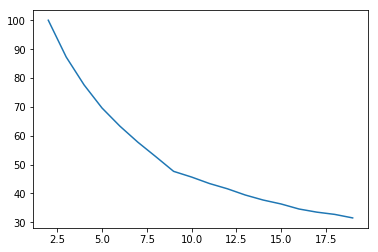

In [97]:
# Using the elbow method
wcss = []
for n_clusters in range(2,20):
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++")
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.figure()
plt.plot(range(2,20), wcss)
plt.show()

In [103]:
# K = 9 seems like a good choice
cust_K_value = 9

kmeans = KMeans(n_clusters=cust_K_value, init="k-means++")
kmeans.fit(scaled_df)
clusters = kmeans.predict(scaled_df)

In [104]:
# The number of customers per cluster
pd.Series(clusters).value_counts()

1    1764
0     199
7     189
2     167
5     145
4     134
6      46
8      11
3       4
dtype: int64

In [105]:
uniq_cust_df['CustomerCluster'] = clusters

In [108]:
# Let us look at the statistics per cluster
mean_cluster_df = uniq_cust_df.groupby('CustomerCluster').mean()
median_cluster_df = uniq_cust_df.groupby('CustomerCluster').median()

In [107]:
round(mean_cluster_df, 2)

Quantity  TotalPrice  cat0   cat1  cat2   cat3  cat4  cat5  \
CustomerCluster                                                               
0                   50.85       77.90  0.04   1.85  0.01   0.24  0.01  0.00   
1                   28.50       52.73  0.06   1.61  0.00   0.22  0.00  0.00   
2                   70.14       88.56  0.08   2.74  0.12   0.32  1.28  0.04   
3                  996.50     1389.30  4.75  88.50  4.50  12.00  3.75  2.25   
4                   66.54      130.88  0.07   3.15  0.07   0.34  0.13  1.12   
5                   49.95       86.27  0.06   2.61  0.07   0.28  0.15  0.02   
6                   82.96      159.37  2.63   4.15  0.11   0.67  0.11  0.13   
7                   48.67       68.13  0.09   2.25  1.11   0.28  0.01  0.01   
8                 1076.73     2036.90  1.55  19.73  1.73   3.09  0.82  0.27   

                 cat6  cat7   cat8  cat9  cat10  
CustomerCluster                                  
0                1.11  0.01   0.32  0.18   0.08  
1                0.00  0.00   0.32  0.13   0.05  
2                0.15  0.04   0.56  0.22   0.12  
3                3.50  1.75  17.00  9.00   4.00  
4                0.11  0.10   0.54  0.22   0.18  
5                0.07  1.16   0.63  0.61   0.26  
6                0.26  0.11   0.57  0.43   0.17  
7                0.09  0.03   0.63  0.22   0.16  
8                0.27  1.82   3.18  3.18   2.36

In [109]:
round(median_cluster_df, 2)

Quantity  TotalPrice  cat0  cat1  cat2  cat3  cat4  cat5  \
CustomerCluster                                                             
0                    26.0       45.33   0.0   1.0   0.0   0.0   0.0   0.0   
1                    12.0       25.00   0.0   1.0   0.0   0.0   0.0   0.0   
2                    35.0       40.50   0.0   2.0   0.0   0.0   1.0   0.0   
3                   769.0     1106.23   5.0  85.0   4.5  13.0   4.0   2.0   
4                    27.5       60.68   0.0   2.0   0.0   0.0   0.0   1.0   
5                    32.0       61.55   0.0   2.0   0.0   0.0   0.0   0.0   
6                    49.0      102.87   2.0   3.0   0.0   0.0   0.0   0.0   
7                    26.0       29.88   0.0   1.0   1.0   0.0   0.0   0.0   
8                   507.0      719.74   1.0  17.0   2.0   3.0   1.0   0.0   

                 cat6  cat7  cat8  cat9  cat10  
CustomerCluster                                 
0                 1.0   0.0   0.0   0.0    0.0  
1                 0.0   0.0   0.0   0.0    0.0  
2                 0.0   0.0   0.0   0.0    0.0  
3                 3.5   1.0  15.5   8.0    3.5  
4                 0.0   0.0   0.0   0.0    0.0  
5                 0.0   1.0   0.0   0.0    0.0  
6                 0.0   0.0   0.0   0.0    0.0  
7                 0.0   0.0   0.0   0.0    0.0  
8                 0.0   2.0   3.0   4.0    3.0